# Imports

In [1]:
import sys
import os

import matplotlib as mpl

project_path = os.path.abspath(os.path.join('..'))

if project_path not in sys.path:
    sys.path.append(f'{project_path}/src/visualizations/')
    
from covid_data_viz import CovidDataViz    

# Setup

In [2]:
mpl.rcParams['figure.figsize'] = (9, 5)

# Goal
My goal is to visualize various aspect of the `COVID-19` pandemic. In this notebook we focus on a high level overview as well as the early days of the pandemic.

# Data sources

In this notebook I use data from the following sources:
- https://github.com/CSSEGISandData/COVID-19 - JHU CSSE COVID-19 Data.
- https://datahub.io/JohnSnowLabs/country-and-continent-codes-list - country codes and continents.

# Data loading

See `src/visualizations/covid_data_viz.py` for code to load the data and reproduce the plots.

In [3]:
cdv = CovidDataViz()

# COVID19 - Globally

The `SARS-CoV-2` disease was first discovered in `Wuhan, Hubei, China` in December 2019. The disease spread rapidly throught the world. In this notebook we see how rapidly and to what extent. Below we plot types of cases worlwide. At the time of writing `(2020-10-05)` the `confirmed` cases are nearing 35 milion.

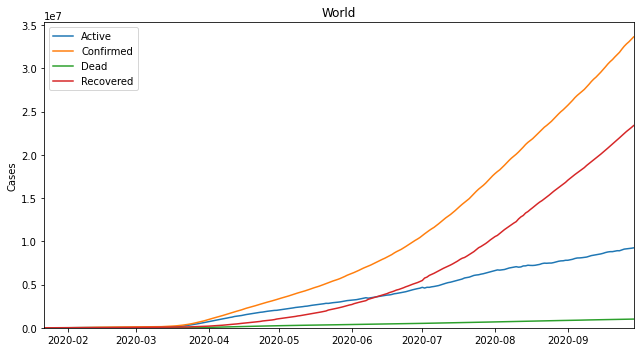

In [4]:
cdv.plot_world_cases()

# COVID19 - By continent

We drill down further into the data visualizing cases data at the continent level. Note that `Asia` is still exhibiting exponential growth and that the continent with least amount of `confirmed` cases is `Australia`.

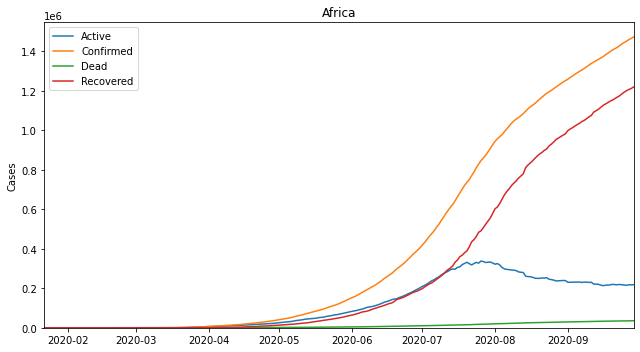

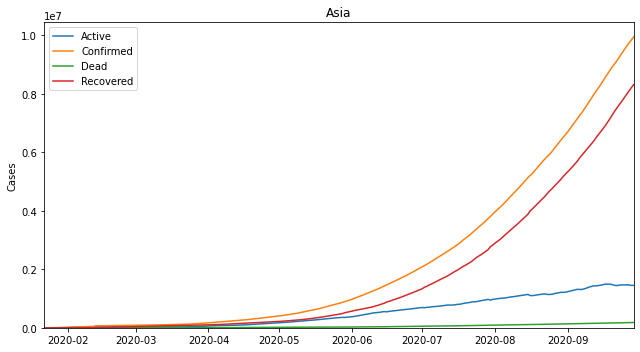

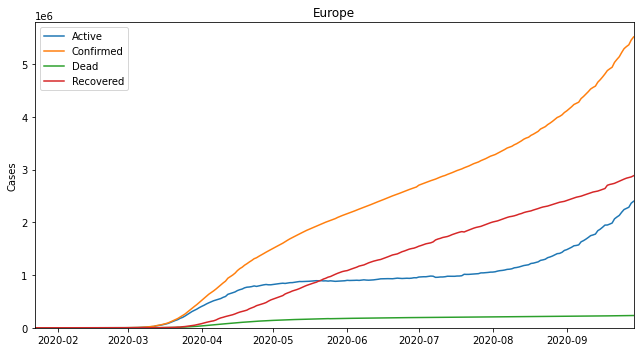

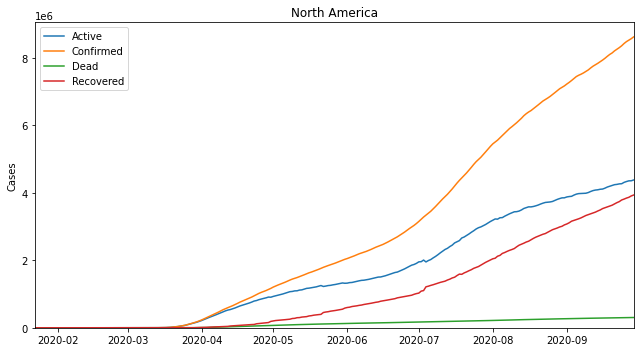

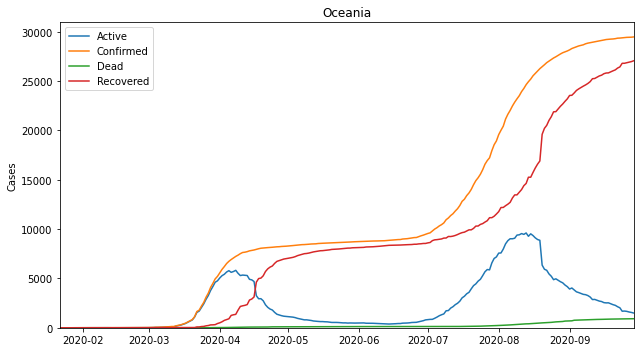

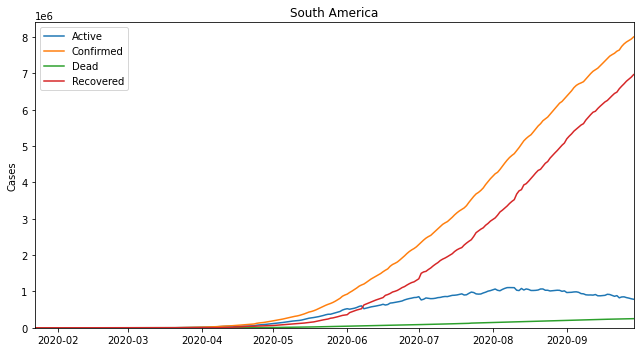

In [5]:
for cont in cdv.all_continents:
    cdv.plot_continent_cases(cont)

# COVID - By country

Finally we can take a look at the data on a country level. First we show the countries with the most `cases`.

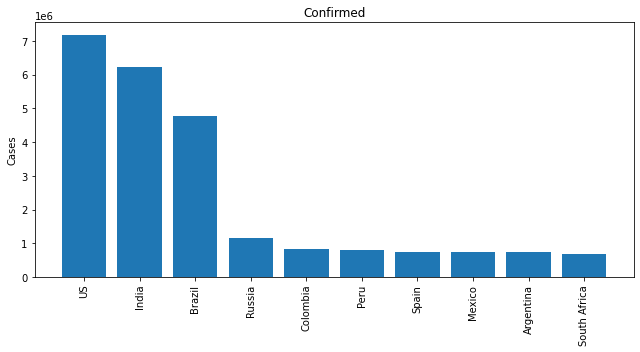

In [6]:
cdv.plot_highest_country_stats('Confirmed')

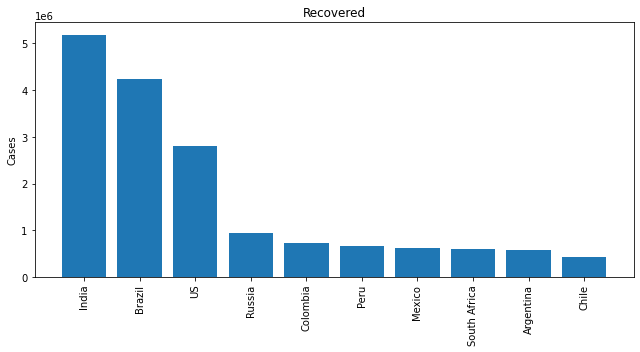

In [7]:
cdv.plot_highest_country_stats('Recovered')

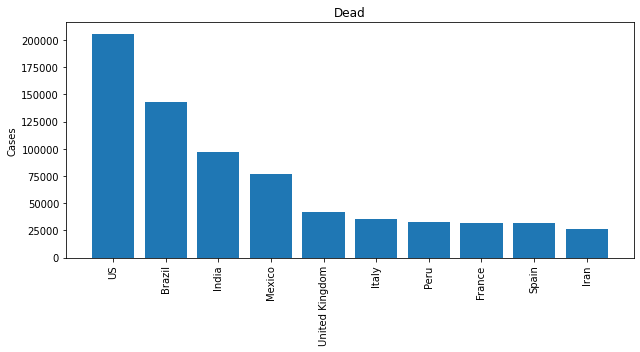

In [8]:
cdv.plot_highest_country_stats('Dead')

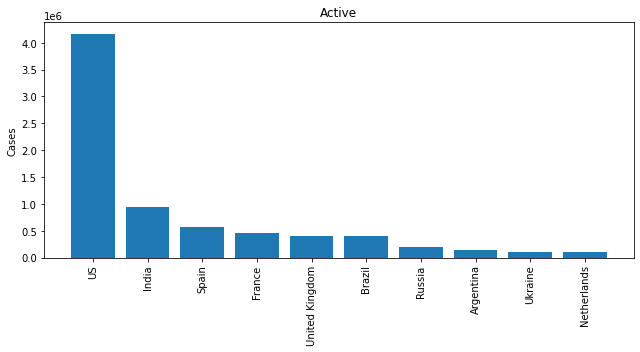

In [9]:
cdv.plot_highest_country_stats('Active')

Then we show countries with `confirmed cases >= 1000` and the highest `mortality rate`.

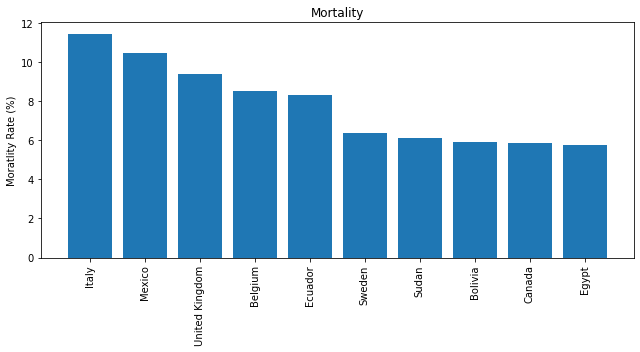

In [10]:
cdv.plot_highest_country_stats('Mortality')

# COVID19 - Growth rates

We proceed to visualize the early days of the pandemic. In most cases the growth was exponential as will be seen.
We use the reindexed `confirmed_cases_t0.csv` file to plot growth curves starting at time `t0` ie  the date when a country achieved `Confirmed >= 100`. The charts are logarithmically scaled. Note that exponential growth on a logarithmic chart is a line. This follows from simple math. Furthermore observer that most of the countries in the plot are able to combat high exponential growth within `30` - `40` days since the `100`th case.

We plot exponential growth curves with different doubling rates against the countries with the most `confirmed cases`.

In [11]:
top_confirmed = sorted(cdv.get_most_cases('Confirmed')['Country'])

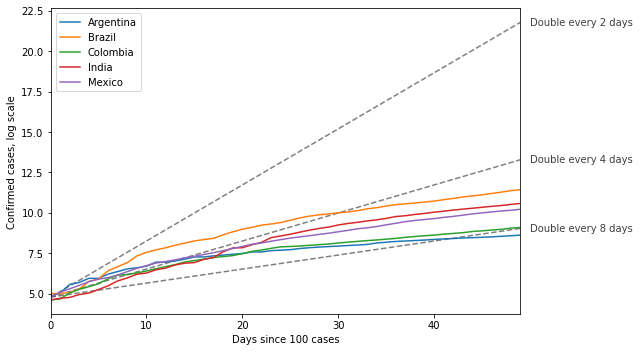

In [12]:
cdv.plot_growth(countries=top_confirmed[0:5], 
               periods=[2,4,8])

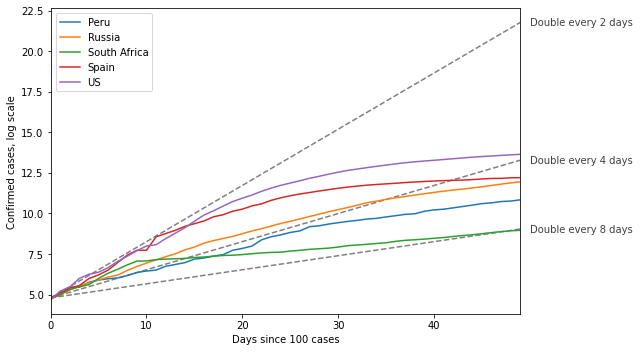

In [13]:
cdv.plot_growth(countries=top_confirmed[5:10], 
                periods=[2,4,8],
                save=True)

We plot the case growth curve against the countries with the highest `mortality rates`.

In [14]:
top_mortality = sorted(cdv.get_most_cases('Mortality')['Country'])

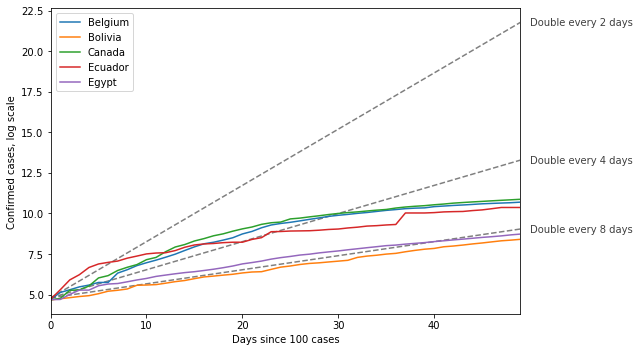

In [15]:
cdv.plot_growth(countries=top_mortality[0:5], 
               periods=[2,4,8])

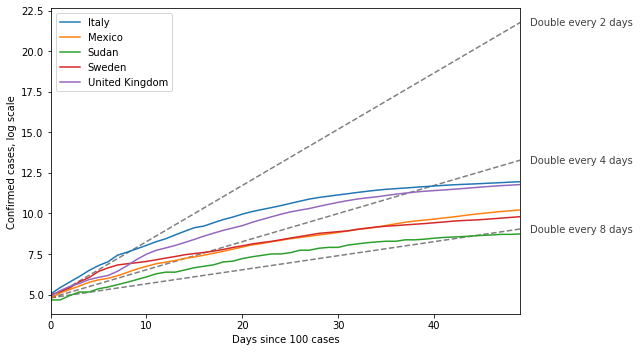

In [16]:
cdv.plot_growth(countries=top_mortality[5:10], 
               periods=[2,4,8])

See the next notebook for more.